In [1]:
# Import the necessary libraries required
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
tdf = pd.read_excel('F:/d4mlp/Tourism.xlsx',sheet_name='Tourism')

In [3]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data Understanding and Inference
1. CustomerID	Unique customer ID
2. ProdTaken	Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age	Age of customer
4. TypeofContact	How customer was contacted (Company Invited or Self Inquiry)
5. CityTier	City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch	Duration of the pitch by a salesperson to the customer
7. Occupation	Occupation of customer
8. Gender	Gender of customer
9. NumberOfPersonVisiting	Total number of persons planning to take the trip with the customer
10. NumberOfFollowups	Total number of follow-ups has been done by sales person after sales pitch
11. ProductPitched	Product pitched by the salesperson
12. PreferredPropertyStar	Preferred hotel property rating by customer
13. MaritalStatus	Marital status of customer
14. NumberOfTrips	Average number of trips in a year by customer
15. Passport	The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore	 Sales pitch satisfaction score
17. OwnCar	Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting	Total number of children with age less than 5 planning to take the trip with the customer
19. Designation	Designation of the customer in the current organization
20. MonthlyIncome	Gross monthly income of the customer


In [4]:
tdf.shape

(4888, 20)

In [5]:
tdf.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [6]:
### Look at different Categorical Variables
# filtering object type columns
cat_columns = tdf.describe(include=["object"]).columns
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [7]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(tdf[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

In [8]:
# Baring Type of Contact, every other Categorical Data are not having any missing values
# The number of records without the Type of Contact is way too low, around 25 records, we will update them with most frequent occuring value of Self Enquiry
# Similarly, Gender value of Fe Male and Female are one and same, lets merge them together

tdf.TypeofContact = tdf.TypeofContact.apply(lambda x: "Self Enquiry" if isinstance(x,str) == False else x)
tdf.Gender = tdf.Gender.apply(lambda x:"Female" if x == "Fe Male" else x)

### Univariate Analysis

In [9]:
## Lets Plot the numeric Data types
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

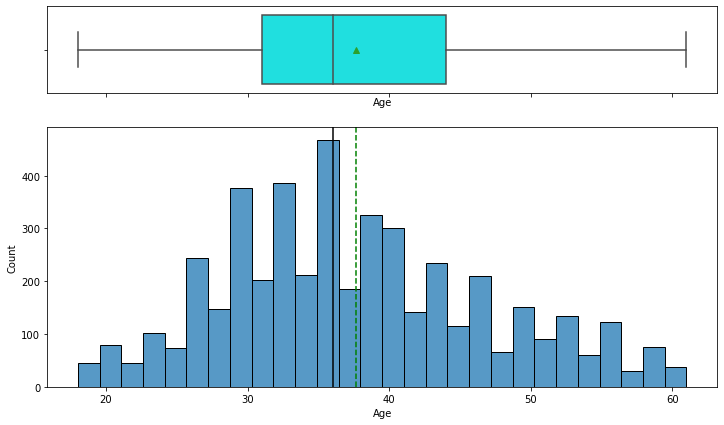

In [11]:
histogram_boxplot(tdf,'Age')
# The Mean Age is at around 37 and we are not observing any outliers outside of the IQR Ranges in box plot

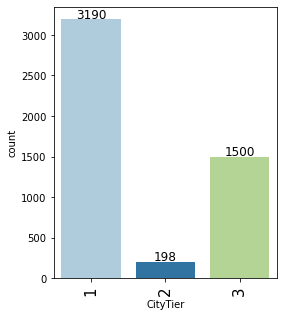

In [12]:
labeled_barplot(tdf,'CityTier')
## This is Categorical Data present as numeric. Most of the entries are Tier-1 Cities



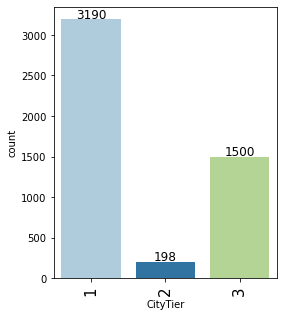

In [13]:
labeled_barplot(tdf,'CityTier')
## This is Categorical Data present as numeric. Most of the entries are Tier-1 Cities

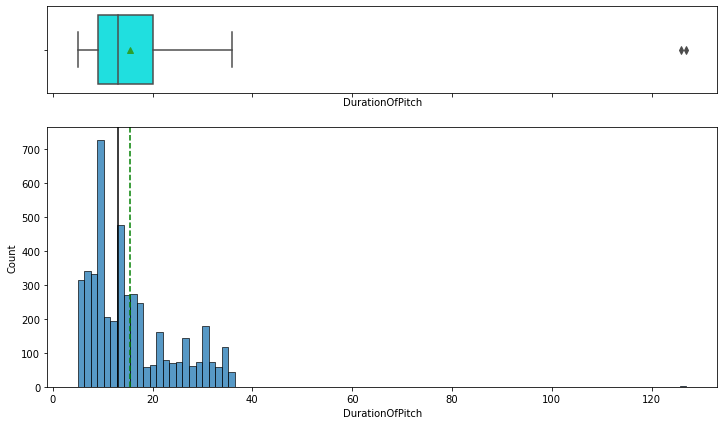

In [14]:
histogram_boxplot(tdf,'DurationOfPitch')
## Most of the Pitces are under 40 days, but there are a few outliers which are higher than 120 days. We could consider normalising this data to 75th Percentile of IQR Range

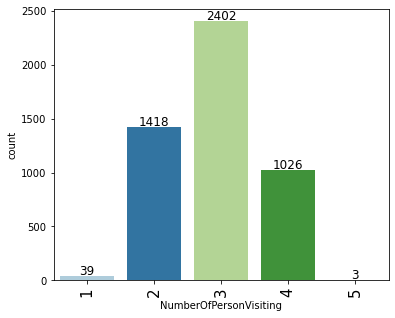

In [15]:
labeled_barplot(tdf,'NumberOfPersonVisiting')

# This is also a Categorical Variable. With 5 people visiting being present as an outlier data point. It will be pointless to transform this data

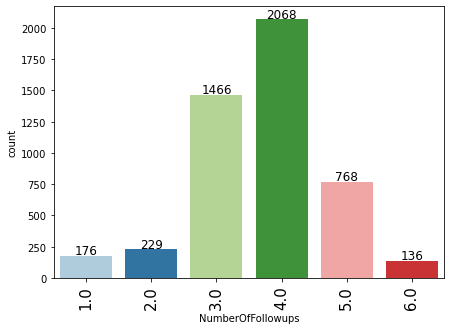

In [16]:
labeled_barplot(tdf,'NumberOfFollowups')

# There are around 45 record for which NumberofFollowups are missing, we will replace this with the mode of 4 as part of missing value treatment

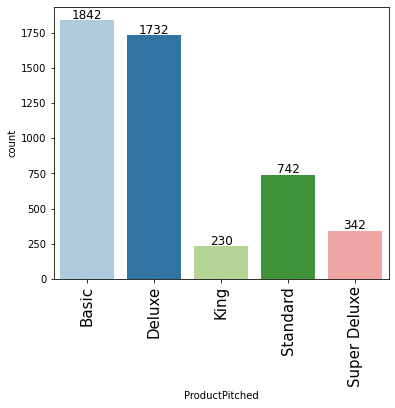

In [17]:
labeled_barplot(tdf,'ProductPitched')
# Basic and Deluxe are the most sold products pitched

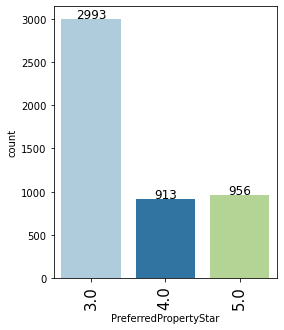

In [18]:
labeled_barplot(tdf,'PreferredPropertyStar')
# There are around 26 record for which this preference is missing, we will replace this with the mode of 3 

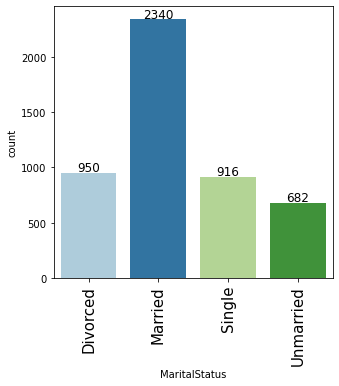

In [19]:
labeled_barplot(tdf,'MaritalStatus')
# Most of the Persons were Married

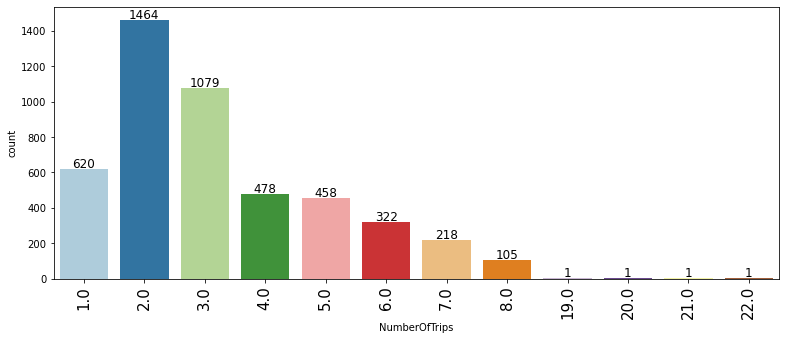

In [20]:
labeled_barplot(tdf,'NumberOfTrips')


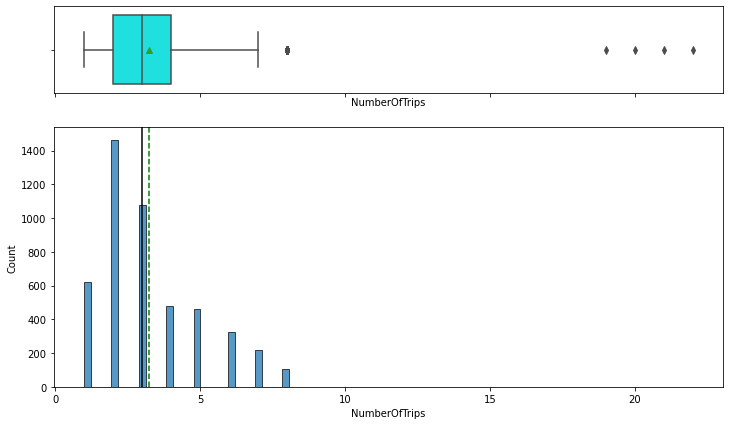

In [21]:
histogram_boxplot(tdf,'NumberOfTrips')
### Data points greater than 75th Percentile could be made to look as 8

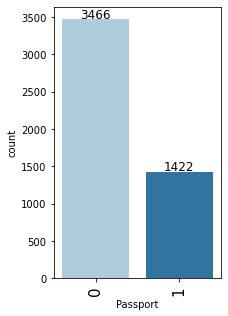

In [22]:

labeled_barplot(tdf,'Passport')


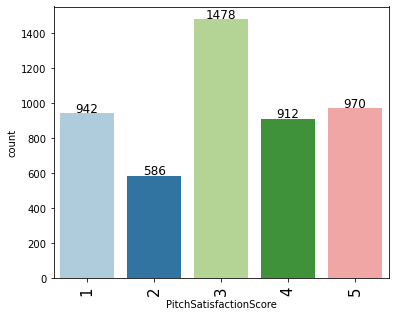

In [23]:
labeled_barplot(tdf,'PitchSatisfactionScore')


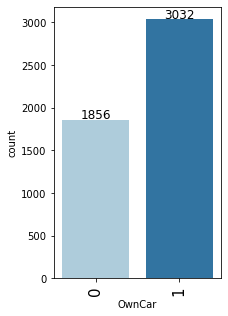

In [24]:
labeled_barplot(tdf,'OwnCar')


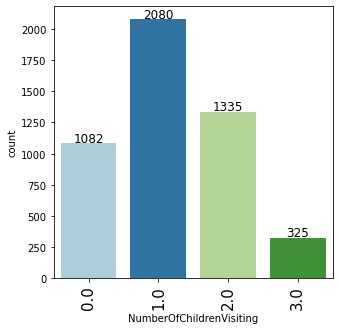

In [25]:
labeled_barplot(tdf,'NumberOfChildrenVisiting')



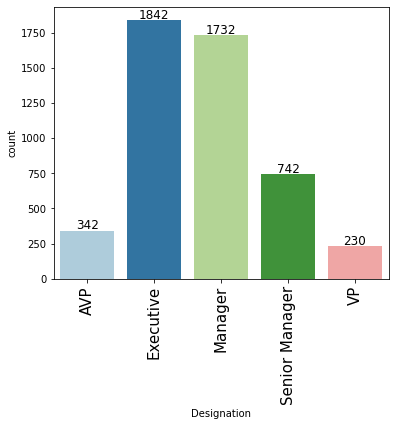

In [26]:
labeled_barplot(tdf,'Designation')



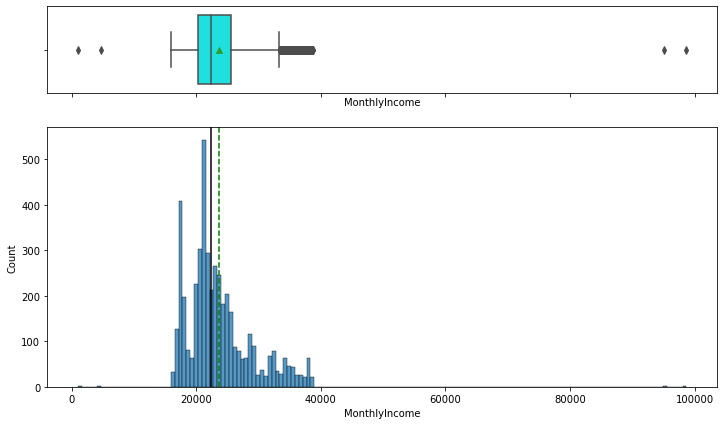

In [27]:
histogram_boxplot(tdf,'MonthlyIncome')


### Inferences from Univariate Analysis

1. The Mean Age is 37 Years, with a minimum of 18 years and maximum of 61 years. Age does not have any outliers beyond the whiskers of Box Plot
2. Type of Contact is mostly Self Enquiry(3.5K), followed by Company Invited(~ 1.5K)
3. CityTier is having maximum number of Customers in Tier-1 Cities, followed by Tier-2 and Tier-3 respectively
3. Mean DurationOfPitch is 15 days, 75th Percentile at 20 days, and maximum value of 127, this could be confirmed h outliers beyond the whiskers of Box Plot
4. Occupation mostly Salaried(2368) and Small Business(2084) as the values which forms the bulk of Occupation
5. Gender column has Male and Female Customers are in the ratio of 60:40 
6. NumberOfPersonVisiting has a mean and mode of 3 with most of the values between 2,3 and 4
7. NumberOfFollowups has a mean of 4 with a minimum of 1 and a maximum of 6, and most of the values are from 3,4 and 5.
8. ProductPitched - Mostly Basic Product is pitched followed by Delux and Standard
9. PreferredPropertyStar - 3 Star Properties are the ones with maximum demand and 4 and 5 star properties have a 20% demand each
10. Marital Status indicates that most of the Customers are either Married or Divorced
11. NumberOfTrips are mostly under 7-8 trips, and there are good number of outliers beyond the whiskers of the box plot
12. Passport - 70% of the Customers do not have Passport
13. PitchSatisfactionScore is widely distributed with 70% of the Satisfaction score between 3 and 5
14. OwnCar - 60% of the people have a OwnCar
15. NumberOfChildrenVisiting is mostly 2 or 3
16. Designation - Executive, Manager and Senior Manager are the most frequently occuring designations
17. MonthlyIncome has a good number of outliers outside of the whiskers of the box plot, with more data points greater than 75% at 25K, and upto a maximum of 98K


### Bivariate Analysis

In [28]:
## Lets start by bringing up some of the re-usable visualisation methods, starting with Stacked Bar Plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [29]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


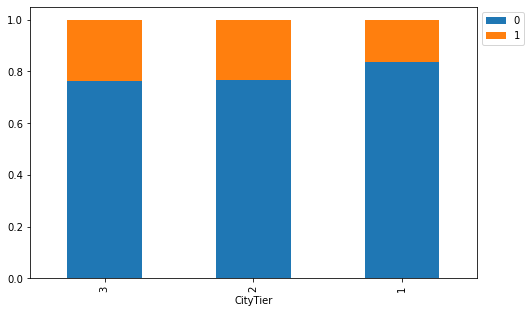

In [30]:
# CityTier,NumberOfPersonVisiting, NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus
# NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting
# ,Designation
# stacked_barplot(tdf,'','ProdTaken')

stacked_barplot(tdf,'CityTier','ProdTaken')


ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


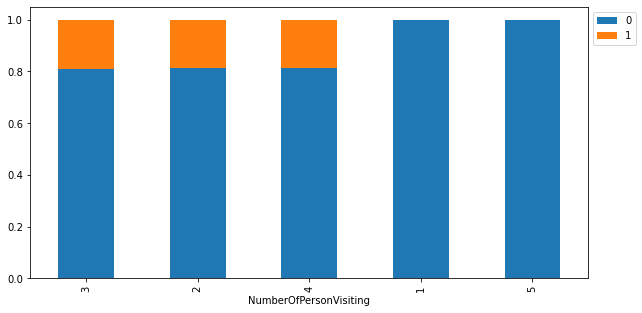

In [31]:
stacked_barplot(tdf,'NumberOfPersonVisiting','ProdTaken')

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


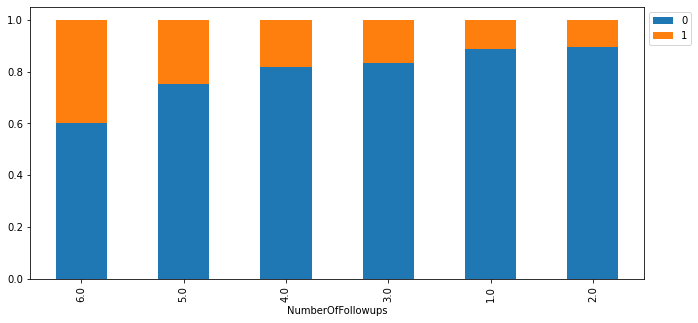

In [32]:
stacked_barplot(tdf,'NumberOfFollowups','ProdTaken')

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


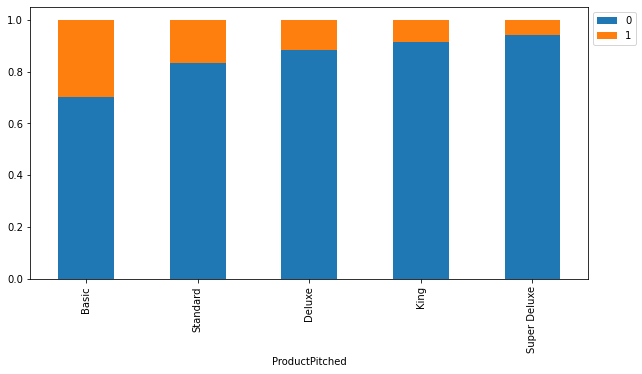

In [33]:
stacked_barplot(tdf,'ProductPitched','ProdTaken')

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


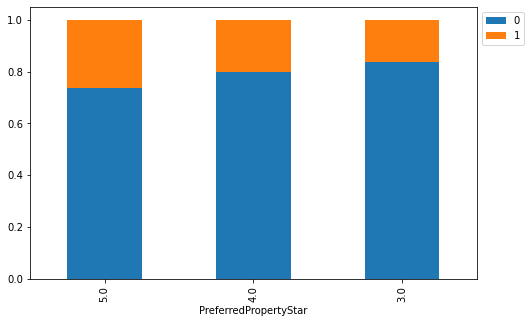

In [34]:
stacked_barplot(tdf,'PreferredPropertyStar','ProdTaken')

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


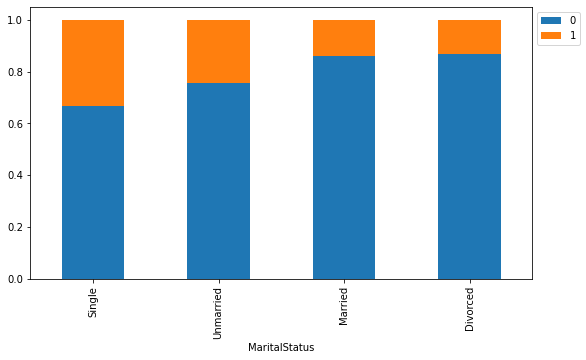

In [35]:
stacked_barplot(tdf,'MaritalStatus','ProdTaken')

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


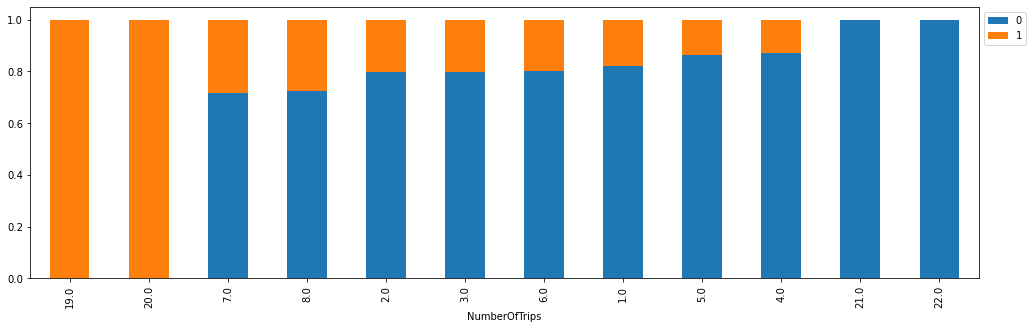

In [36]:

stacked_barplot(tdf,'NumberOfTrips','ProdTaken')

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


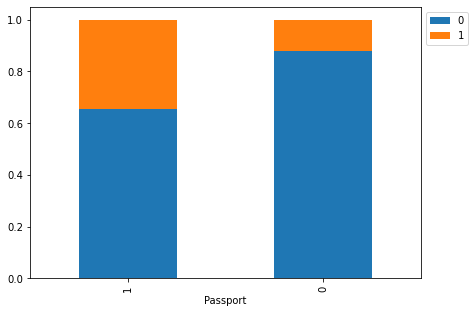

In [37]:
stacked_barplot(tdf,'Passport','ProdTaken')

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


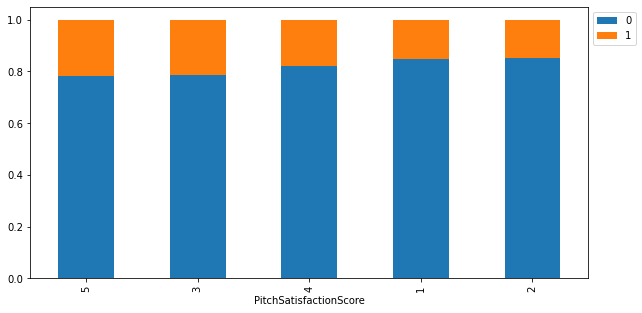

In [38]:
stacked_barplot(tdf,'PitchSatisfactionScore','ProdTaken')

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


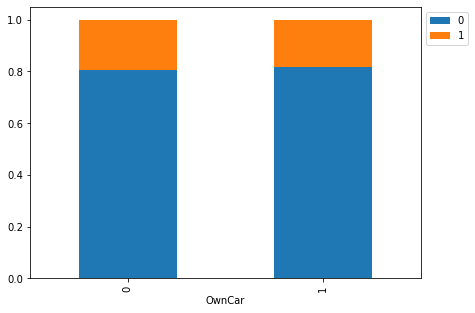

In [39]:
stacked_barplot(tdf,'OwnCar','ProdTaken')

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


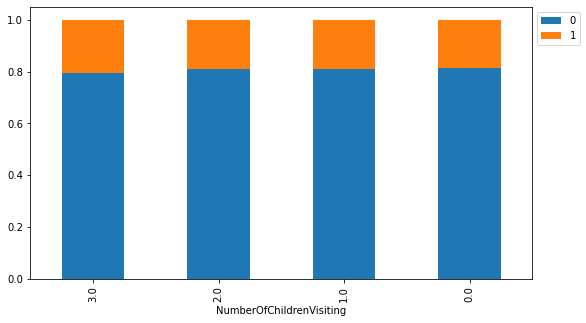

In [40]:
stacked_barplot(tdf,'NumberOfChildrenVisiting','ProdTaken')

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


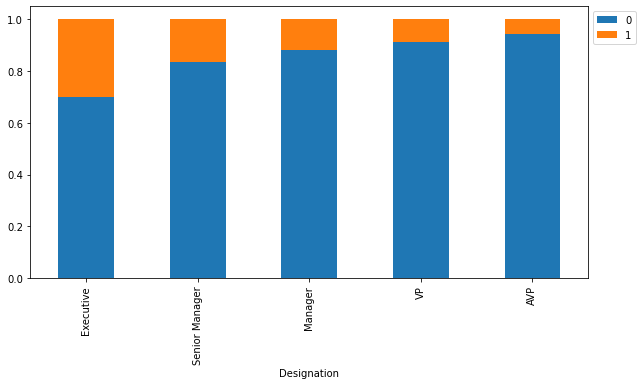

In [41]:
stacked_barplot(tdf,'Designation','ProdTaken')

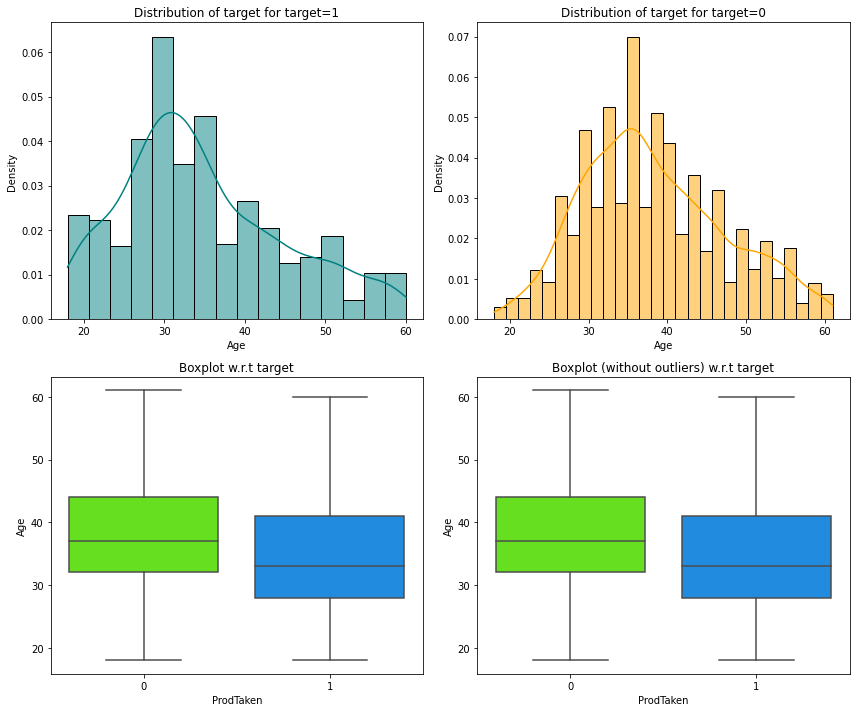

In [42]:
distribution_plot_wrt_target(tdf,'Age','ProdTaken')

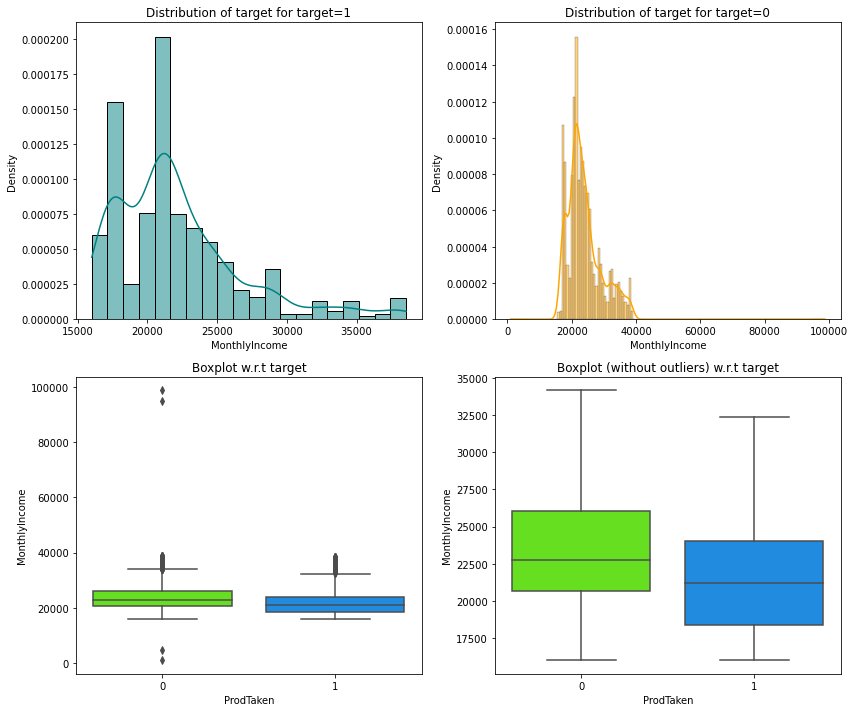

In [43]:
distribution_plot_wrt_target(tdf,'MonthlyIncome','ProdTaken')

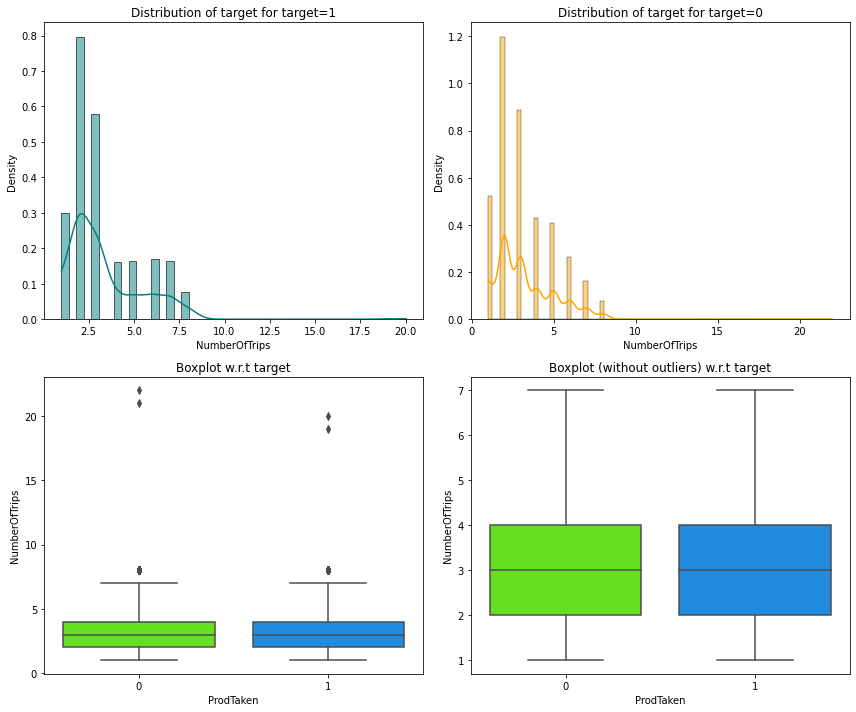

In [44]:
distribution_plot_wrt_target(tdf,'NumberOfTrips','ProdTaken')

### Observations & Inferences from Exploratory Data Analysis
1. The Tier-3 and Tier-2 Cities have more Customers than Tier-1 City
2. NumberOfPersonVisiting between 3,4,5 people results in Product Taken
3. Chances of Product Taken increases with more NumberOfFollowups 
4. The higher the ProductPitched increases from Basic, Standard upto Super Deluxe the chances of the Product Taken decreases
5. People buy Products when they are Single or Unmarried more in MaritalStatus than Married or Divorced
6. As the NumberOfTrips increases the number of ProductTaken increases, which indicates a positive experience score from every trip
7. People with a Passport are bound to travel more than the ones without a Passport
8. The Most Satisfied Customers have taken Products More at 5.0 Stars
9. People without a OwnCar have taken Product more than the ones with a Car
10. NumberOfChildrenVisiting does not seems to have an impact on the result of people taking the Product
11. People designated as Executives and Senior Manager tend to take the Product more than a VP/AVP or Manager
12. Younger Customers with a mean age of less than 30 tends to take the Product more than older Customers
13. Customers with a Monthly Income between the 25th and 50th Percentile or 17,500 to 22500 tends to take the Product from the Travel Company

### Data Preprocessing
<b>Missing Value Treatment</b>

In [45]:
# Lets look at the columns that have missing values
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [46]:
#Replace Empty Age with Mean for Age

meanAge = round(tdf.Age.mean())
tdf.Age = tdf.Age.apply(lambda x: meanAge if np.isnan(x) else x  )

In [47]:
#Replace Empty DurationOfPitch with Mean for DurationOfPitch

meanPitch = round(tdf.DurationOfPitch.mean())
tdf.DurationOfPitch = tdf.DurationOfPitch.apply(lambda x: meanPitch if np.isnan(x) else x  )


In [48]:
# Replace Empty NumberOfFollowups with Mean for NumberOfFollowups
meanFollowup = round(tdf.NumberOfFollowups.mean())
tdf.NumberOfFollowups = tdf.NumberOfFollowups.apply(lambda x: meanFollowup if np.isnan(x) else x  )

In [49]:
# Replace Empty PreferredPropertyStar with Mode for PreferredPropertyStar

modePPStar  = round(tdf.PreferredPropertyStar.mode())
tdf.PreferredPropertyStar = tdf.PreferredPropertyStar.apply(lambda x: modePPStar[0] if np.isnan(x) else x  )

In [50]:
# Replace Empty NumberOfTrips with Mean for NumberOfTrips

meanNoTrips  = round(tdf.NumberOfTrips.mean())
tdf.NumberOfTrips = tdf.NumberOfTrips.apply(lambda x: meanNoTrips if np.isnan(x) else x  )

In [51]:
# Replace Empty NumberOfChildrenVisiting with Mode for NumberOfChildrenVisiting

modeChildren  = round(tdf.NumberOfChildrenVisiting.mode())
tdf.NumberOfChildrenVisiting = tdf.NumberOfChildrenVisiting.apply(lambda x: modeChildren[0] if np.isnan(x) else x  )

In [52]:
# Replace Empty MonthlyIncome with Mean for MonthlyIncome

meanMonIncome  = round(tdf.MonthlyIncome.mean())
tdf.MonthlyIncome = tdf.MonthlyIncome.apply(lambda x: meanMonIncome if np.isnan(x) else x  )

<b>Outlier Treatment</b>

In [53]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [54]:
outlierCols = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
tdf = treat_outliers_all(tdf,outlierCols)